We will be using the Heart Disease dataset from the UCI Machine Learning Repository.


Specifically, we will be using one of the processed datasets from Cleveland, which has 14 attributes (most important ones used in other scientific works) from the total 76 features.

The dataset comprises 303 observations, 13 features, and 1 target attribute. The 13 features include the results of non-invasive diagnostic tests along with other relevant patient information. The target variable includes the result of the invasive coronary angiogram which represents the presence or absence of coronary artery disease in the patient with 0 representing the absence of CHD and labels 1-4 representing the presence of CHD.

Full details of attributes can be found here:

Link: https://archive.ics.uci.edu/ml/datasets/heart+disease




## 1. Classification using Tree-Based Classifiers  




**Steps:**
1. Read the dataset using Pandas. The outcome column in this dataset is `num`, which has values 0, 1, 2, 3. We will transform this to a binary classification task. The column `num` represents the presence or absence of coronary artery disease in the patient with 0 representing the absence of CHD and labels 1-4 representing the presence of CHD. Create an outcome column (say "chd"), with a value of  1, indicating the presence of CHD and a value of 0, indicating the absence of CHD. Remove the column `num` as it is no longer needed.

2. Divide the dataset into feature matrix (X) and outcome arrays (y). Here the outcome  (y) is the newly created binary column that you create in 1.

3. Perform any required data preprocessing of the features (X). This might include missing value imputation, normalization, and handling categorical columns.

4. Split the dataset into training and test sets. Use a split of your choice (e.g. 80/20 or 70/30).

5. Fit a Decision Tree Classifier (DTC) on the training set and report the classification metrics (using classification report) on the test set. Rank the features in the dataset based on features importance returned the trained DTC model.

6. Repeat Step (5) using the Random Forest Classifier (RFC). Is there any difference in the feature importance ranking compared with DTC? If yes, which one (RFC or DTC) returns a better ranking according to you.


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [67]:
import pandas as pd

data_path = '/content/drive/MyDrive/heart+disease/processed.cleveland.data'

# Full list of column names for the 14-column dataset
full_column_names = [
    "age",      # Age in years
    "sex",      # Sex (categorical)
    "cp",       # Chest pain type (categorical)
    "trestbps", # Resting blood pressure (mm Hg)
    "chol",     # Serum cholesterol (mg/dl)
    "fbs",      # Fasting blood sugar > 120 mg/dl (categorical)
    "restecg",  # Resting electrocardiographic results (categorical)
    "thalach",  # Maximum heart rate achieved
    "exang",    # Exercise induced angina (categorical)
    "oldpeak",  # ST depression induced by exercise relative to rest
    "slope",    # Slope of the peak exercise ST segment
    "ca",       # Number of major vessels colored by fluoroscopy
    "thal",     # Thalassemia status
    "num"       # Diagnosis of heart disease (0 = no, 1–4 = yes)
]

df_full = pd.read_csv(data_path, header=None, names=full_column_names, na_values='?')
print(df_full.head())

print(df_full.shape)



    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  num
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0  0.0   6.0    0
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0  3.0   3.0    2
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0  2.0   7.0    1
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0  0.0   3.0    0
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0  0.0   3.0    0
(303, 14)


In [68]:
print(df_full.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], dtype='object')


In [69]:
# Convert 'num' into binary 'chd' (1 for CHD, 0 for no CHD)
df_full['chd'] = df_full['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop the 'num' column as it's no longer needed
df_full = df_full.drop(columns=['num'])

# Verify the change
df_full.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [70]:
# Feature matrix
X = df_full.drop(columns=['chd'])

# Target array
y = df_full['chd']

# Verify shapes
print(X.shape, y.shape)


(303, 13) (303,)


In [71]:
# Check the number of missing values per column
print(df.isnull().sum())

# Returns True if there are any missing values, otherwise False
print(df.isnull().values.any())




age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
dtype: int64
False


In [72]:
# No normalization needed because:
# - Decision Tree Classifier (DTC) and Random Forest Classifier (RFC) are not sensitive to feature scales.

# No categorical encoding needed because:
# - Categorical features are already represented as numeric values and decision trees can handle numeric categories directly.

In [73]:
# Splitting the dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}\n")

Training set shape: (242, 13), Test set shape: (61, 13)



Decision Tree Classifier Performance:

              precision    recall  f1-score   support

           0       0.85      0.67      0.75        33
           1       0.69      0.86      0.76        28

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

Accuracy: 0.7540983606557377


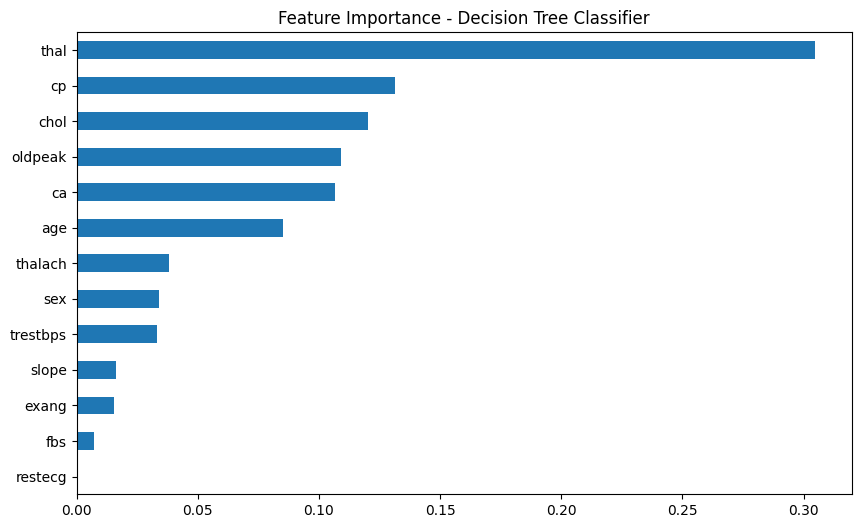

In [74]:
# Initialize and fit the DTC model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions
y_pred_dtc = dtc.predict(X_test)

# Evaluate performance
print("Decision Tree Classifier Performance:\n")
print(classification_report(y_test, y_pred_dtc))
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))

feature_importances_dtc = pd.Series(dtc.feature_importances_, index=X.columns)
feature_importances_dtc.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance - Decision Tree Classifier')
plt.show()

Random Forest Classifier Performance:

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61

Accuracy: 0.8852459016393442


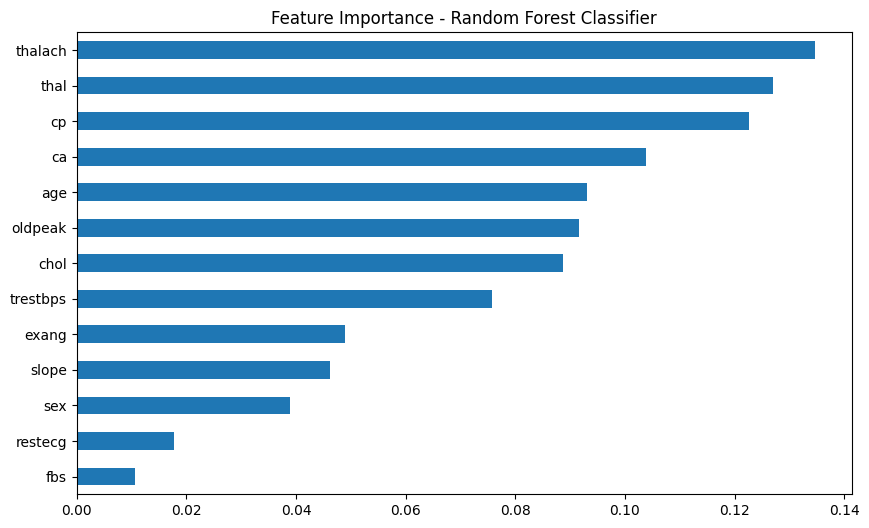

In [75]:
# Initialize and fit the RFC model
rfc = RandomForestClassifier(random_state=42, n_estimators=100)  # Use 100 trees
rfc.fit(X_train, y_train)

# Make predictions
y_pred_rfc = rfc.predict(X_test)

# Evaluate performance
print("Random Forest Classifier Performance:\n")
print(classification_report(y_test, y_pred_rfc))
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))

# Feature importance plot
feature_importances_rfc = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances_rfc.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance - Random Forest Classifier')
plt.show()

Yes, there is a difference in the feature importance ranking between DTC and RFC. RFC is preferred as it provides a more reliable and robust ranking of features, aligning better with the improved model performance (higher accuracy and balanced precision/recall).